
# Radar observation : rainfall composite product, quality code

The aim of this notebook is to indicate how to read the quality code data of the rainfall product.

For each pixel of the rainfall product is associated a quality code with values between 0 (very bad) and 100 (perfect), the unit is the percent. If the value is missing, then the value is 255. These quality code data are stored per period of 10 or 11 days per geographic zone (each month is separated in 3 files). The zones called 'NW' (for North-West of France) and 'SE' (for South-East of France).

The time step is 5 min (per day, start hour :00h and end hour : 23h55), the spatial resolution, 1 km.
The original data are too heavy so the quality code data are divided into 2 files : 
<ul>
    <li>1 file containing the mean of the quality code per day and per pixel (example file : ...quality_mean.npz)</li>
    <li>1 file containing the difference between the original value and the mean per pixel (example file : ...quality_diff.npz) </li>
</ul>

The missing values are also 255.

Remark about the mean computing : if there is no value for 1 day and 1 pixel, it will be indicated as a missing value, else the mean computing is done over the non missing values for 1 day and 1 pixel.

Remark : the *Basemap* library is required to plot the background map. Here is the command to type into in a terminal to install the package if you use the Anaconda environment : *conda install -c anaconda basemap*

In [1]:
from data_exploration.utils.user_configuration import *
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.basemap import Basemap, cm 


In [2]:
####Cell containing the modifiable fields######
data_path = path + 'radar/rainfall/'   #path to the rainfall data
zone = 'NW'      #study zone 
date_i = '20180521'     #start date of the file
date_f = '20180531'     #end date of the file
#days to select (/!\ each file containts at most 10 or 11 days)
#modifiable field because the data might be too heavy according to the available RAM.
day_i = 1           #number of the first day
day_f = 10           #number of the last day

In [3]:
complete_path = data_path + zone + '/' + str(date_i[0:4]) + '/' + str(date_i[4:6]) + '/'

file_mean = zone+'_'+date_i+'_'+date_f+'_rainfall_quality_mean.npz'      #name of the file containing the means
file_diff = zone+'_'+date_i+'_'+date_f+'_rainfall_quality_diff.npz'      #name of the file containing the differences

nb_per_day = 24*12     #number of files par day (frequency, 5 min)

#coordinates of study zone boundaries
lllat=DOMAINS[zone]['lry']    #lower left latitude
urlat=DOMAINS[zone]['uly']    #upper right latitude
lllon=DOMAINS[zone]['ulx']    #lower left longitude
urlon=DOMAINS[zone]['lrx']    #upper right longitude

In [4]:
#data loading
m = np.load(complete_path+file_mean,allow_pickle=True)
d = np.load(complete_path+file_diff,allow_pickle=True)
#subset of data from the first day day_i to the last day day_f
mean_data = m['data'][day_i-1:day_f,:,:]         #values of the means
mean_dates = m['dates'][day_i-1:day_f]           #dates of the means (year, month, day)
diff_data = d['data'][(day_i-1)*nb_per_day:(day_f)*nb_per_day,:,:]    #values of the differences
diff_dates = d['dates'][(day_i-1)*nb_per_day:(day_f)*nb_per_day]                                #dates of the differences (year, month, day, hour, minute)

Mean data dimensions:

<ul>
<li>time dimension (=days number)</li>
<li>points number for longitude</li>
<li>points number for latitude</li>
</ul>   

In [5]:
mean_data.shape

(10, 496, 689)

Dimensions of the 'dates' array of the means:
<ul>
    <li>time dimension(=days number)</li>
</ul>

In [7]:
mean_dates.shape

(10,)

Overview of mean_dates values :

In [8]:
mean_dates

array([datetime.date(2018, 5, 21), datetime.date(2018, 5, 22),
       datetime.date(2018, 5, 23), datetime.date(2018, 5, 24),
       datetime.date(2018, 5, 25), datetime.date(2018, 5, 26),
       datetime.date(2018, 5, 27), datetime.date(2018, 5, 28),
       datetime.date(2018, 5, 29), datetime.date(2018, 5, 30)],
      dtype=object)

Overview of mean data of type int16

In [9]:
mean_data

array([[[255, 255, 255, ...,  61,  62,  61],
        [255, 255, 255, ...,  63,  63,  63],
        [255, 255, 255, ...,  62,  62,  62],
        ...,
        [255, 255, 255, ...,  78,  78,  78],
        [255, 255, 255, ...,  79,  79,  79],
        [255, 255, 255, ...,  79,  79,  79]],

       [[255, 255, 255, ...,  62,  61,  61],
        [255, 255, 255, ...,  62,  62,  62],
        [255, 255, 255, ...,  62,  62,  62],
        ...,
        [255, 255, 255, ...,  78,  77,  77],
        [255, 255, 255, ...,  79,  79,  79],
        [255, 255, 255, ...,  79,  79,  79]],

       [[255, 255, 255, ...,  62,  62,  62],
        [255, 255, 255, ...,  63,  63,  63],
        [255, 255, 255, ...,  63,  63,  63],
        ...,
        [255, 255, 255, ...,  77,  77,  77],
        [255, 255, 255, ...,  78,  78,  78],
        [255, 255, 255, ...,  79,  78,  78]],

       ...,

       [[255, 255, 255, ...,  57,  57,  57],
        [255, 255, 255, ...,  57,  57,  57],
        [255, 255, 255, ...,  57,  57,  57

Set of possible mean values over the chosen period at the beggining of the notebook 

In [10]:
np.unique(mean_data)

array([ 20,  21,  22,  24,  25,  33,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 255], dtype=int16)

Example of plot of mean values for a given day per pixel

<IPython.core.display.Javascript object>


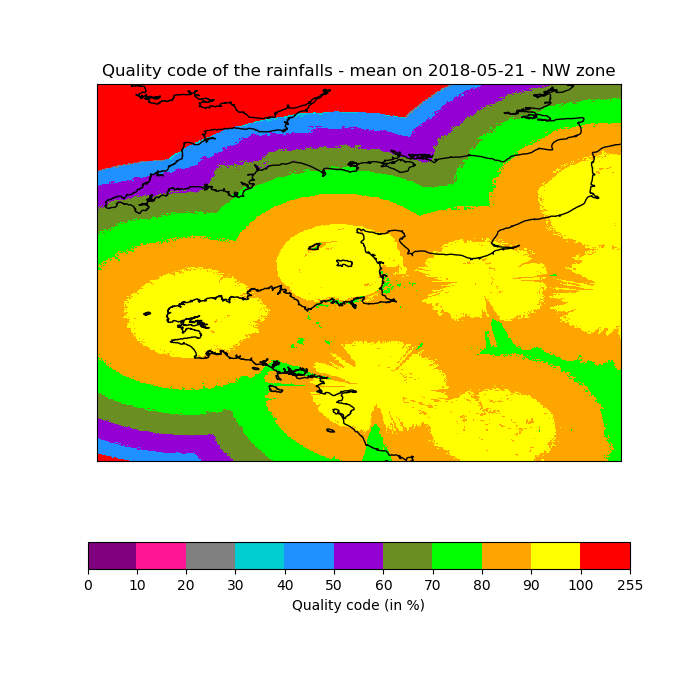

C:\Users\chabotv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
C:\Users\chabotv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [11]:
index = 0      #index of time dimension

fig,ax=plt.subplots(1,1,figsize=(7,7))

#background map definition : coordinates of corners, resolution, projection type
m1 = Basemap(epsg=n_epsg,resolution='h',llcrnrlat=lllat,
                  urcrnrlat=urlat,
                  llcrnrlon=lllon,
                  urcrnrlon=urlon)

#colorbar definition
cmap = colors.ListedColormap(['purple', 'deeppink', 'grey','darkturquoise', 'dodgerblue','darkviolet','olivedrab'
                                  ,'lime','orange','yellow','red'])
bounds = [0,10,20,30,40,50,60,70,80,90,100,255]
norm = colors.BoundaryNorm(bounds, cmap.N)

#plot the data and the background map (coastlines and borders)
m1.drawcoastlines()
m1.drawcountries()
img=m1.imshow(mean_data[index,:,:], interpolation='none', origin='upper',
                    cmap=cmap, norm=norm)
plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds, orientation= 'horizontal').set_label('Quality code (in %)')
plt.title("Quality code of the rainfalls - mean on "+ str(mean_dates[index]) + " - "+ zone + " zone")
plt.show()

Difference data dimensions: 
<ul>
<li>time dimension(=days number*24*12 -> time frequency of 5min)</li> 
<li>points number for longitude</li>
<li>points number for latitude</li>
</ul>    

In [12]:
diff_data.shape

(2880, 496, 689)

Dimensions of the 'dates' array of the differences:
<ul>
    <li>time dimension(=days number*24*12 -> time frequency of 5min)</li>
</ul>

In [13]:
diff_dates.shape

(2880,)

Overview of diff_dates values :

In [14]:
diff_dates

array([datetime.datetime(2018, 5, 21, 0, 0),
       datetime.datetime(2018, 5, 21, 0, 5),
       datetime.datetime(2018, 5, 21, 0, 10), ...,
       datetime.datetime(2018, 5, 30, 23, 45),
       datetime.datetime(2018, 5, 30, 23, 50),
       datetime.datetime(2018, 5, 30, 23, 55)], dtype=object)

Overview of "differences" data of type int16 

In [15]:
diff_data

array([[[255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        ...,
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0]],

       [[255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        ...,
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0]],

       [[255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        ...,
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0]],

       ...,

       [[255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0

Set of possible difference values over the chosen period at the beggining of the notebook 

In [16]:
np.unique(diff_data)

array([-69, -68, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55,
       -54, -53, -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42,
       -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29,
       -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16,
       -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,
        -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
        11,  12,  13,  14,  15,  16,  17,  18,  19,  21, 255], dtype=int16)

To find recover the original values (mean+diff):

In [17]:
x = mean_data.shape[1]      #dimension in longitude
y = mean_data.shape[2]      #dimension in latitude
data = np.zeros(((day_f-day_i+1)*nb_per_day,x,y),dtype=np.int16)     #initialisation of the array containing the original values
for l in range(1,day_f-day_i+1):                                 #computing the original value = mean + diff
    data[(l-1)*nb_per_day:l*nb_per_day,:,:] = mean_data[l-1,:,:] + diff_data[(l-1)*nb_per_day:l*nb_per_day,:,:]
data[diff_data==255] = 255  #put 255 for the missing values 
np.unique(data)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 255], dtype=int16)

Plot example of original values for a given time step and a given zone :

<IPython.core.display.Javascript object>


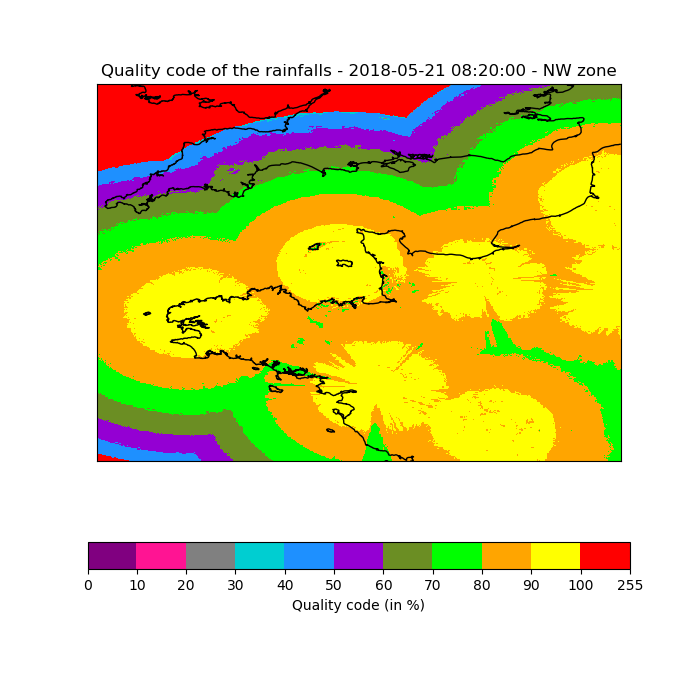

C:\Users\chabotv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
C:\Users\chabotv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [18]:
index_data = 100   #index of time dimension 

fig,ax=plt.subplots(1,1,figsize=(7,7))

#background map definition : coordinates of corners, resolution, projection type
m2 = Basemap(epsg=n_epsg,resolution='h',llcrnrlat=lllat,
                  urcrnrlat=urlat,
                  llcrnrlon=lllon,
                  urcrnrlon=urlon)

#colorbar definition
cmap = colors.ListedColormap(['purple', 'deeppink', 'grey','darkturquoise', 'dodgerblue','darkviolet','olivedrab'
                                  ,'lime','orange','yellow','red'])
bounds = [0,10,20,30,40,50,60,70,80,90,100,255]
norm = colors.BoundaryNorm(bounds, cmap.N)

#plot the data and the background map (coastlines and borders)
m2.drawcoastlines()
m2.drawcountries()
img=m2.imshow(data[index_data,:,:], interpolation='none', origin='upper',
                    cmap=cmap, norm=norm)
plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds, orientation= 'horizontal').set_label('Quality code (in %)')
plt.title("Quality code of the rainfalls - "+ str(diff_dates[index_data]) +' - '+ zone + " zone")
plt.show()

In [19]:
m.fid.close()
d.fid.close()